Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?
- [X] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [X] Determine whether your problem is regression or classification.
- [X] Choose your evaluation metric.
- [X] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [X] Begin to clean and explore your data.
- [X] Choose which features, if any, to exclude. Would some features "leak" information from the future?

## Reading
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [1]:
################################ EDA IMPORTS ###################################
%matplotlib inline
import pandas as pd 
import pandas_profiling # Quick Data Analysis
import numpy as np # Linear Algebra lib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go # interactive low-level plotting lib https://plot.ly/python/
import plotly.express as px #high-level api wrapper for plotly https://plot.ly/python/plotly-express/#visualize-distributions
# ---------------- Plot libs settings ------------- #
# Pick style of Matplolib plots 
# Different style sheets:-> https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
# Configure Seaborn Asthetics: -> https://seaborn.pydata.org/tutorial/aesthetics.html?highlight=style
plt.style.use('seaborn-darkgrid')
sns.set(context='notebook', style='darkgrid', palette='colorblind')
# Seting a universal figure size 
plt.rcParams['figure.figsize'] = (10, 6)

# ---------------- Pandas settings ------------- #
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

################################################################################

## Project PUBG 🤖💣💥🔫🤖 


### So, where we droppin' boys and girls?
PUBG or Player Unknown Battlegrounds is a battle-royale style game where at the beginning of the play, nearly 100 people parachute onto an island without any equipment. In order to win the game, you need to scavenge for weapons and available equipment to eliminate the other people and survive to the end. The game also restricts player in Hunger Game style by reducing the playable are in map after a some amount of fixed time is passed. 

### Objective

**Defining the problem:** The problem we have is, there is not set guide or strategy to improve player performance in PUBG, should your play style be stealth like a ninja and sneak upon unsuspecting players, or by camping in one spot and hide your way into victory, or snipe like assassin, or do you need to be aggressive and play like Rambo? 

**Solution:** Is to create a web application that allows players to improve their strategy by considering *What-if* scenarios as MVP.

### Data Mining

The team at [PUBG](https://www.pubg.com/) has made official game data available for the public to explore and scavenge outside of "The Blue Circle." This competition is not an official or affiliated PUBG site - Kaggle collected data made possible through the [PUBG Developer API](https://developer.pubg.com/).

![](https://d.newsweek.com/en/full/854048/pubg-logo.jpg)

### Data Description

We are given over 65,000 games worth of anonymized player data, split into training and testing sets. 

- DBNOs - Number of enemy players knocked.
-assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

### Load Dataset

In [2]:
def reduce_mem_usage(df, verbose=True):
    """ Function iterates through all the columns of a dataframe and modify the data type
        to reduce memory usage.
        
        Credit to: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
        
        Parameters
        ----------
        df : Pandas DataFrame
        verbose: (True) by default, prints out before and after memory usage
        
        Returns
        -------
        df : Reduced Memory Pandas DataFrame
        
    """
    
    if verbose:
        start_mem = df.memory_usage().sum() / 1024**2
        print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    if verbose:
        end_mem = df.memory_usage().sum() / 1024**2
        print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df



def load_dataset(verbose=True, develop=True):
    
    # If you're in Colab...
    import os, sys
    in_colab = 'google.colab' in sys.modules
    if in_colab:
    # Install required python package:
    # category_encoders, version >= 2.0
        !pip install --upgrade category_encoders
        
        # Pull files from Github repo
        os.chdir('/content')
        !git init .
        !git remote add origin https://github.com/hurshd0/DS-Unit-2-Applied-Modeling.git
        !git pull origin master
        
        # Change into directory for module
        os.chdir('module1')
        
        # Download ~1GB dataset
        !rm -rf ../data/project-pubg
        !mkdir -p ../data/project-pubg
        !wget 'https://project-pubg.s3.us-east-2.amazonaws.com/train_V2.csv' -P ../data/project-pubg
        !wget 'https://project-pubg.s3.us-east-2.amazonaws.com/test_V2.csv' -P ../data/project-pubg
        !wget 'https://project-pubg.s3.us-east-2.amazonaws.com/sample_submission_V2.csv' -P ../data/project-pubg
    
    
    # Load training set
    if verbose:
        print('-' * 80)
        print('Load: train')
    train = pd.read_csv('../data/project-pubg/train_V2.csv')
    train = reduce_mem_usage(train, verbose=verbose)
    
    # Load sample submission
    if not develop:
        # Load test set
        if verbose:
            print('-' * 80)
            print('Load: test')
        test = pd.read_csv('../data/project-pubg/test_V2.csv')
        test = reduce_mem_usage(test, verbose=verbose)
    
        if verbose:
            print('-' * 80)
            print('Load: sample submission')
        sample_submission = pd.read_csv('../data/project-pubg/sample_submission_V2.csv')
        sample_submission = reduce_mem_usage(sample_submission, verbose=verbose)
        
        if verbose:
            print(
            f'''
            -------------------- SHAPE ---------------------
            Train Set: {train.shape}
            Test Set: {test.shape}
            Sample Submission: {sample_submission.shape}
            ------------------------------------------------
            ''')
        # Return data frames
        return (train, test, sample_submission)
    
    return train

traindf = load_dataset()

--------------------------------------------------------------------------------
Load: train
Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%


In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float16
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float16
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float16
roadKills          int8
swimDistance       float16
teamKills          int8
vehicleDestroys    int8
walkDistance       float16
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float16
dtypes: float16(6), int16(5), int8(14), object(4)
memory usage: 288.4+ MB


### Check for Missing Values

In [4]:
traindf.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

Let's look at the row which has missing `target` value.

In [5]:
traindf[traindf['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


Looks like most values are `0`, it is safe to drop this observation now.

In [6]:
traindf = traindf[~traindf['winPlacePerc'].isnull()]

### Check for duplicates

In [7]:
traindf[traindf.duplicated()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


Great! there are no duplicates.

### Make a random sample for EDA

In [48]:
def get_random_sample(df, n=None, frac=None, seed=42, verbose=True):
    if not n and frac:
        sample = traindf.sample(frac=frac, random_state=seed)
    if not frac and n:
        sample = traindf.sample(n=n, random_state=seed)
    if verbose:
        print('----------- DATAFRAME DIMS -----------')
        print('Before Sampling: ', df.shape)
        print('After Sampling: ', sample.shape)
    return sample
sampledf = get_random_sample(traindf, frac=0.1)
sampledf.head()

----------- DATAFRAME DIMS -----------
Before Sampling:  (4446965, 29)
After Sampling:  (444696, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4270780,ef2d51d18a38cf,6dfb23f52dc772,e1c02c1421bdd4,2,1,60.468750,0,0,0,62,0,0,0,0.0,1373,squad,26,26,1515,0,167.875,0,131.0,0,0,1157.0,6,0,0.280029
1687951,0ccf6e163b5009,43b509a591d8f1,7669a0409fa32a,0,3,635.000000,0,0,2,2,999,6,1,274.5,1471,solo-fpp,99,97,-1,0,0.000,0,0.0,0,0,1900.0,7,1497,0.856934
3732583,948c2d231060b2,3d2944992d2111,a3eae2eaede76e,0,6,100.000000,0,0,10,26,0,1,1,5.0,1862,solo-fpp,97,93,1543,0,946.000,0,0.0,0,0,4060.0,3,0,0.781250
3386217,3a5872249139fc,405f55ab35614a,a22b2e7366205a,0,0,48.593750,0,0,0,81,0,0,0,0.0,1369,squad-fpp,30,27,1491,0,0.000,0,0.0,0,0,119.0,1,0,0.137939
243580,a78cc239213b35,cb396c5f1bb96e,7f9e3909d86e2e,0,3,19.296875,0,0,1,55,1127,0,0,0.0,1365,solo-fpp,96,96,-1,0,0.000,0,0.0,0,0,1489.0,5,1427,0.726074


By taking random sample we reduced from ~4.4 Million rows to 44,4696 rows which would make it easier to plot and reduce memory usage.

## Assignment

- [X] Choose your target. Which column in your tabular dataset will you predict?

`target` in this case is `winPlacePerc`, column, that predicts percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match.

- [X] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.

Since this is dataset was obtained from `Kaggle` competition, we would just need to split the `training` set into `train` and `validation` set. Our strategy would be to:

- Use **Train/validate split: random 80/20%** for 
- **K-fold Cross-Validation**

For now let's use `80/20 split`. 

- [X] Determine whether your problem is regression or classification.

Based on the problem statement, our problem is framed as **regression** type, but we can also `bin` the winning percentiles into groups and predict those groups instead. 

- [X] Choose your evaluation metric.

Since we are dealing with **regression** type question, and target is `percentile winning placement` between 0 and 1, we can use MAE, RMSE, and $R^2$ to better understand the model.

- [X] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.

> Unfortunately, since we have right-skewed distribution of `winPlacePerc`, we   are not getting accurate description.

In [49]:
sampledf['winPlacePerc'].describe()

count    444696.000000
mean               NaN
std           0.000000
min           0.000000
25%           0.197876
50%           0.457520
75%           0.740723
max           1.000000
Name: winPlacePerc, dtype: float64

- [X] Begin to clean and explore your data.

### Descriptive Statistics

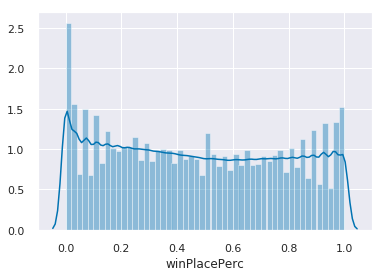

In [46]:
sns.distplot(traindf['winPlacePerc'])

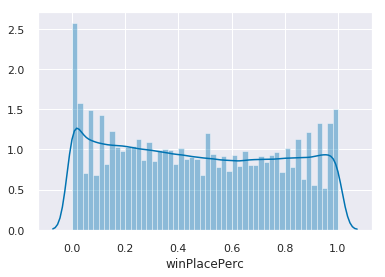

In [50]:
sns.distplot(sampledf['winPlacePerc'])

In [52]:
sampledf['maxPlace'].describe()

count    444696.000000
mean         44.538712
std          23.828098
min           2.000000
25%          28.000000
50%          30.000000
75%          49.000000
max         100.000000
Name: maxPlace, dtype: float64

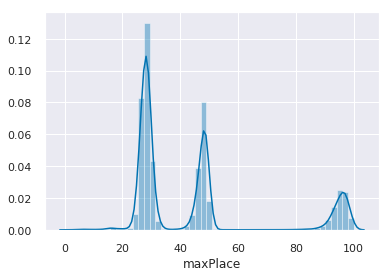

In [54]:
sns.distplot(sampledf['maxPlace'])

In [55]:
sampledf['matchId'].value_counts()

895de0a11d38c9    24
3afbd6918e5e6d    23
a02f9c0098cc49    22
1c4d93adfb274e    22
3a68add79d6cdc    22
569d35084241c2    21
d5399f92998398    21
e8336f62d2cea6    21
a28be2fe5b60a6    21
d7cc732f21ce14    21
6555414d27bf5c    21
46f6da24c35d4e    21
83542e5c7bf154    21
67be55446cf38a    21
832063075e7a1f    21
21c4c23d3a59a5    21
a7f8e4de1559bf    21
6f6e52b15ddf21    20
043f425796c880    20
a3a927ba4f46ac    20
f6af68f8497794    20
89744378e7d896    20
6e1c038a094d4e    20
09b7d062f3e33f    20
fd84dcb1709790    20
b96eb1f1c1abd0    20
026a721f307c2a    20
ae4fb2776a79d8    20
caff21999a7efd    20
1762d73f167f56    20
bd7eba91143ba5    20
3f6822b2c6c009    20
e08800705f144c    20
dbf671e1aa35a6    20
9d52f40fd47fa3    20
7bd93ed6417b62    20
42490c069f224a    20
7b6d1f8e80d921    19
d280301d27a1e2    19
f39f32d061cb62    19
3658dd7597e911    19
f5509a8f8c1291    19
6dbc09b786728f    19
8f71db40d8f928    19
4854d6116dfd3c    19
0af455d705db2a    19
b436a667b6f91c    19
1694abcf59b46

In [56]:
sampledf['groupId'].value_counts()

128b07271aa012    11
b8275198faa03b     8
e52a2e6ca30474     7
59b747efaf412d     6
0349718cf8f9ae     6
dc59955bab46b9     5
8eebb70eeb97d9     5
25d4110b8b6453     5
14d6b54cdec6bc     5
7d3f34dda6becb     5
be06e09201647c     5
8a39b9d7c241c4     5
7d4b0abf82fbb7     5
961c23a6ba6877     5
85710ef42bbe8b     5
6fdd93a6a2e63f     5
22b7253e72b85b     5
b4e5008ebf508e     5
72d00552a03e45     5
6a292d4d1a0207     5
50b3868ca27477     5
0215cfd0069974     5
39429a65fc603d     5
d4f3f9e8e8f5db     5
5e95849ccba9a6     5
5327836bddd2ee     5
bf709a19ec4ea7     5
97a1178dd8fa67     5
dd5048f99fcacc     5
7018f5130d25ba     5
ea9e10e84d1640     5
6b51e6ee4090a9     5
6d4362962ea033     5
4ce6d4a0c8268e     5
6cf057e17002ff     5
1c847d96a7ee4d     5
3edf1ccba9fece     5
e8d2b3018f9d69     5
ff53c380912c8a     5
181f78d12cced8     5
29c474f0f08767     5
5d71784d4bffd1     5
38f10a41910aa4     5
87b520de98dd6d     5
f8ab612d4d94f9     5
45489606a3981b     5
0369698d71cd23     5
21897c3900d15

In [51]:
sampledf.query('winPlacePerc == 0')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1830481,6f0a3fc5134110,47458e09570b3f,12acd71ccf720e,0,0,0.000000,0,0,0,93,0,0,0,0.000000,1393,solo-fpp,96,92,1540,0,0.000,0,0.0,0,0,0.000000,0,0,0.0
3741626,34879507ddb31b,72adcd1e4ecdf4,15fc8b0fa83dee,0,0,0.000000,0,0,0,91,0,0,0,0.000000,1250,squad-fpp,28,28,1445,0,0.000,0,0.0,0,0,17.343750,0,0,0.0
2573305,3aae61852db298,0e84960e746377,b2e7123e126ecd,0,0,0.000000,0,0,0,92,0,0,0,0.000000,1456,squad,28,28,1465,0,0.000,0,0.0,0,0,27.093750,1,0,0.0
1070327,3826ec6e46ac44,a5375b80733c72,f123c645ba9fe9,0,0,0.000000,2,0,0,87,0,0,0,0.000000,1821,squad-fpp,28,26,1514,0,0.000,0,0.0,2,0,58.000000,3,0,0.0
3971537,62288debdf588b,cbbef0cf29bbdd,bcad401f6d2c81,0,0,0.000000,0,0,0,95,1321,0,0,0.000000,1371,squad-fpp,30,29,-1,0,0.000,0,0.0,0,0,7.367188,1,1508,0.0
2852072,76fa8fb64e13f7,e41ebbbae4e3e7,a8f572e9bd1cc5,0,0,0.000000,0,0,0,89,0,0,0,0.000000,1866,squad,28,27,1460,0,0.000,0,0.0,0,0,91.062500,1,0,0.0
1143478,295ce423599fdc,5792ee39f35cdc,450e028f3ced95,0,0,320.000000,0,0,0,3,0,0,0,0.000000,1808,solo,15,2,1500,0,0.000,0,0.0,0,0,0.000000,3,0,0.0
4279698,d749ac87a04c6e,0eb74ed0cd3a3a,dbf097244413f1,0,0,0.000000,0,0,0,94,1438,0,0,0.000000,1291,duo-fpp,47,44,-1,0,0.000,0,0.0,0,0,17.546875,1,1451,0.0
2744597,fbab556a433a26,ac9ae56588f964,ca9b4fec4b25b6,0,0,0.000000,0,0,0,91,0,0,0,0.000000,1884,squad,29,26,100,0,0.000,0,0.0,0,0,0.000000,0,0,0.0
2069484,f40e1bb83edf52,3e901dfa3150ec,770e56bb59edd9,0,0,100.000000,1,0,0,39,1116,1,1,1.964844,1355,squad-fpp,28,27,-1,0,0.000,0,0.0,0,0,49.093750,1,1469,0.0


### Single Variable Analysis

### Pairwise Analysis

- [X] Choose which features, if any, to exclude. Would some features "leak" information from the future?